## Logistic Regression
python 3.5

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def readData(file):
    # The data file should only contain tab-separated numbers
    # The last item of each line is the label
    X = []
    labels = []
    f = open(file, 'r')
    for line in f.readlines():
        line = line.strip().split()
        X.append([1.0]+[float(x) for x in line[:-1]]) # 1.0 corresponds to intercept
        labels.append(int(eval(line[-1])))
    return X, labels

def sigmoid(x):
    return 1/(1+np.exp(-x))

def logisticR_SGA(X, labels, epoch=100, batchSize=10, alpha=0.01):
    # function to train a logistic regression model through stochastic gradient ascent
    XMat = np.mat(X)
    labelMat = np.mat(labels).transpose()
    n, p = XMat.shape
    n_batch = n // batchSize
    weights = np.ones((p,1))
    logLike = []
    idx = list(range(n))
    for i in range(epoch):
        alpha_batch = alpha/(1+0.01*i) # decrease alpha for each epoch
        random.shuffle(idx) # shuffle data
        for j in range(n_batch):
            idx_batch = idx[(j*batchSize):((j+1)*batchSize)]
            XMat_batch = XMat[idx_batch]
            labelMat_batch = labelMat[idx_batch]
            h_batch = sigmoid(XMat_batch*weights)
            error = labelMat_batch - h_batch
            weights = weights + alpha_batch*XMat_batch.transpose()*error
        if n % batchSize != 0:
            idx_batch = idx[(n_batch*batchSize):]
            XMat_batch = XMat[idx_batch]
            labelMat_batch = labelMat[idx_batch]
            h_batch = sigmoid(XMat_batch*weights)
            error = labelMat_batch - h_batch
            weights = weights + alpha_batch*XMat_batch.transpose()*error
        h = sigmoid(XMat*weights)
        ll = labelMat.transpose()*h + (1-labelMat).transpose()*(1-h)
        logLike.append(ll[0,0])
    plt.plot(np.arange(0, epoch, 1), np.array(logLike))
    plt.xlabel("epoch")
    plt.ylabel("log-likelihood")    
    return weights  

def predict(testX, weights):
    testXMat = np.mat(testX)
    prob = sigmoid(testXMat*weights)
    prob = prob.getA()[:,0]
    return (prob > 0.5).astype(int)

### Test model

In [3]:
# data come from Peter Harrington's "Machine Learning in Action"
trainX, trainLabel = readData('Train.txt')
testX, testLabel = readData('Test.txt')

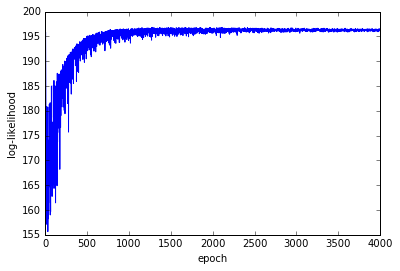

In [4]:
lr_weights = logisticR_SGA(trainX, trainLabel, epoch=4000, alpha=0.0001)

In [5]:
pred = predict(testX, lr_weights)
print("Accuracy on test data is %4.3f" % (sum(pred == np.array(testLabel))/len(testLabel)))

Accuracy on test data is 0.761
